# Tarea 1 Física Computacional


In [ ]:
from pylab import *

1. Utilizando las notas de clase y notebooks de la pagina del curso genere una función que calcule derivadas e integrales numéricas que consideren una precisión en las que se desprecien terminos mayores a h4 en el espaciado de la malla en el dominio de la función. Muestra que tus funciones trabajan bien con un ejemplo en el cual calcules su derivada e integral de forma analítica. 

Función de ejemplo
$$
y = -cos(x);
\quad
\int_{1}^{10} (-cos(x)) dx
$$

In [ ]:
def mi_derivada(x,f_x): #nombre de la función para la derivada que desprecia términos mayores a h4
  df_x = zeros(len(f_x))
  
  h12 , h = 12*(x[1] -x[0]) , (x[1] - x[0])
  for i in range(len(df_x)-4):
    df_x[i+1]= (-f_x[i+4] + 8*f_x[i+3] - 8*f_x[i+1] + f_x[i])
  df_x = df_x /h12
  df_x[0] = (f_x[1]-f_x[0])/h
  df_x[1] = (f_x[2]-f_x[0])/(2*h)
  df_x[-1] = (f_x[-1]-f_x[-2])/h
  df_x[-2] = (f_x[-1]-f_x[-3])/(2*h)
  
  return df_x #regresa el resultado de la derivada

def mi_integral(x,y):
    integral = 0
    h = x[1] - x[0]
    if mod(len(y),2) == 0:
        inicio = 2
    elif mod(len(y),2) == 1:
        inicio = 1
    for i in range(inicio,len(y)-1,2):
        integral += y[i+1] + 4*y[i] + y[i-1]
    integral = integral*(h/3)
    # punto inicial si se tiene un arreglo par
    if mod(len(y),2) == 0:
        integral += (h/48)*(23*y[0] + 26*y[1] - 4*y[2] + 6*y[3] -3*y[4])
    return integral #regresa el resultado de la integral
  

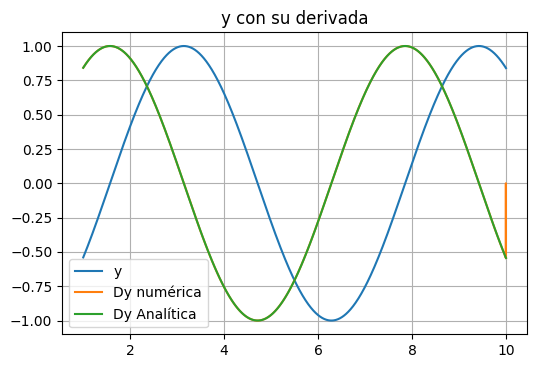

In [ ]:
a = linspace(1,10,10000) # Dominio
y1 =  -cos(a)   # función ejemplo ejercicio 1
figure(dpi=100)
plot(a,y1, label = 'y') # grafica de la función y
dy_analit = sin(a) # derivada analítica de y
dy = mi_derivada(a, y1) # derivada numérica de y
plot(a,dy, label = 'Dy numérica')
plot(a,dy_analit,label = 'Dy Analítica')
plt.title('y con su derivada')
legend()
grid()
show()
# Dy numérica se encuentra debajo de Dy analítica

In [ ]:
# Integral analítica calculada de 1 a 10 de -cos(x) = -sin(10)+sin(1)
integral_analit = 1.385492096 #... Calculada con la calculadora en radianes

In [ ]:
# Integral
inte_analit = -cos(a)
integra = mi_integral(a,y1)
print(integra) # Por lo tanto sí tiene exactitud hasta 1e-5

1.385492095697243


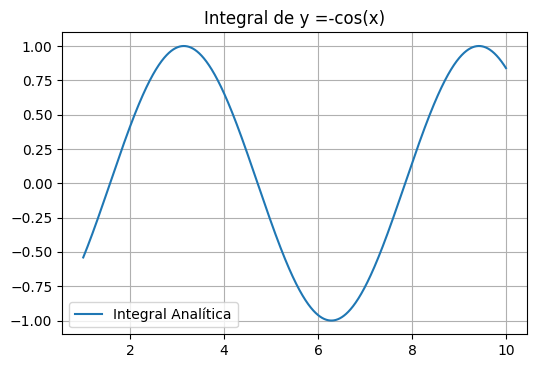

In [ ]:
figure(dpi=100)
plot(a,inte_analit, label = 'Integral Analítica')
plt.title('Integral de y =-cos(x)')
legend()
grid()
show()

2. Calcule la derivada analıtica de las funciones. Realice las graficas de las funciones y sus primeras dos derivadas. Con los algoritmos vistos en clase (los que desprecian terminos mayores a $O(h 2)$), encuentre la derivada numerica de dichas funciones con error menor a $10^{-5} $para cualquier punto y compare con las derivadas analıticas. También realice una comparación utilizando la funcion derivada del problema anterior.

$$
f(x) = e^{-x^2}sen(10x) \quad x \in [-5,5]
$$

$$
g(x) = - \frac{2}{x^6} + \frac{1}{x^{12}} \quad x \in [0.5,5]
$$

In [ ]:
def mi_derivada_h2(x,f_x):
  df_x = zeros(len(f_x)) 
  h2 = 2*(x[1] - x[0])
  for i in range(len(df_x)-2):   # puntos interiores
    df_x[i+1] = (f_x[i+2] - f_x[i]) /(h2)
    df_x[0] = (f_x[1]-f_x[0])/(0.5*h2)
  df_x[-1] = (f_x[-1] - f_x[-2]) /(0.5*h2)
  return df_x

(a) Para f(x)

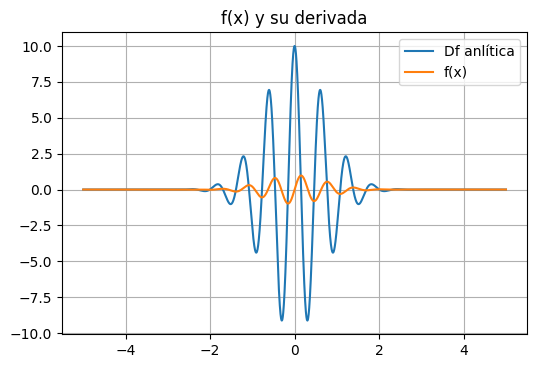

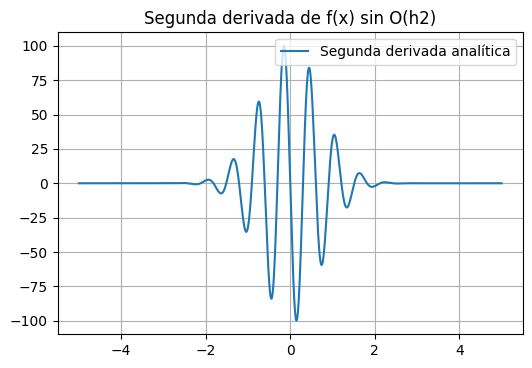

In [ ]:
# Derivada análitica de f(x) 
x1 = linspace(-5,5,100000)
f= exp(-x1**2)*sin(10*x1)
df_analit = -2*exp(-x1**2)*x1*sin(10*x1)+10*exp(-x1**2)*cos(10*x1)
# Gráficas
figure(dpi=100)
plot(x1,df_analit, label='Df anlítica')
plot(x1,f, label = 'f(x)')
plt.title('f(x) y su derivada')
legend()
grid()
show()

# Segunda derivada analítica de f(x)
d2f_analit = 4*exp(-x1**2)*x1**2*sin(10*x1)-40*exp(-x1**2)*x1*cos(10*x1)-102*exp(-x1**2)*sin(10*x1)
# Segunda derivada numerica de f(x)
d2f = mi_derivada_h2(x1,df_analit)
figure(dpi=100)
plot(x1,d2f_analit, label ='Segunda derivada analítica')
plt.title('Segunda derivada de f(x) sin O(h2)')
legend()
grid()
show()

In [ ]:
df = mi_derivada_h2(x1,f)

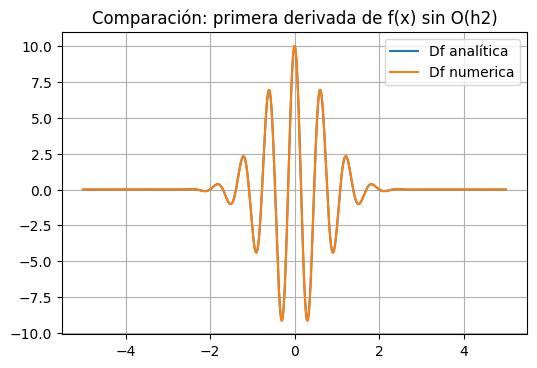

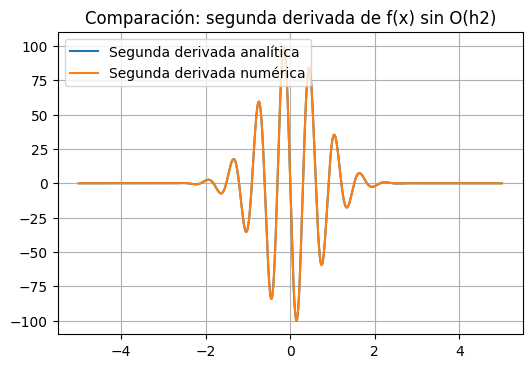

In [ ]:
# Comparación
figure(dpi=100)
plot(x1,df_analit, label = 'Df analítica')
plot(x1,df, label = 'Df numerica')
plt.title('Comparación: primera derivada de f(x) sin O(h2)')
legend()
grid()
show()
# Comparación
figure(dpi=100)
plot(x1,d2f_analit, label ='Segunda derivada analítica')
plot(x1,d2f, label = 'Segunda derivada numérica')
plt.title('Comparación: segunda derivada de f(x) sin O(h2)')
legend()
grid()
show()
# Df analítica se encuentra debajo de Df numérica al igual que D2f

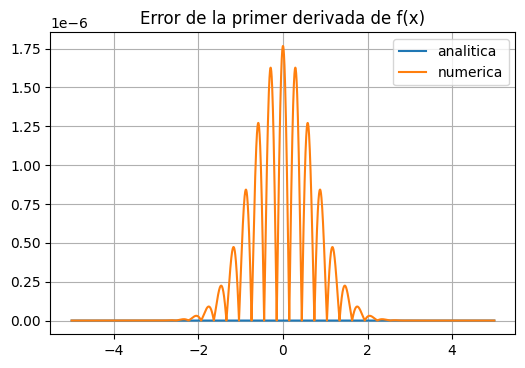

In [ ]:
# error de la primer derivada
figure(dpi=100)
plot(x1,abs(df_analit-df_analit), label = 'analitica') 
plot(x1,abs(df_analit-df), label = 'numerica') # Se observa que tiene error en los extremos del orden de 1e-6 en el caso de la derivada
plt.title('Error de la primer derivada de f(x)')
legend()
grid()
show()

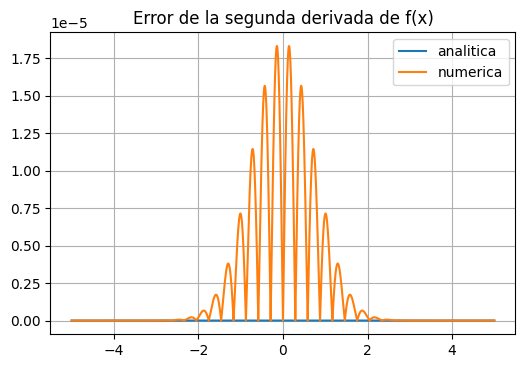

In [ ]:
# error de la segunda derivada
figure(dpi=100)
plot(x1,abs(d2f_analit-d2f_analit), label = 'analitica') 
plot(x1,abs(d2f_analit-d2f), label = 'numerica')
plt.title('Error de la segunda derivada de f(x)')
legend()
grid()
show()

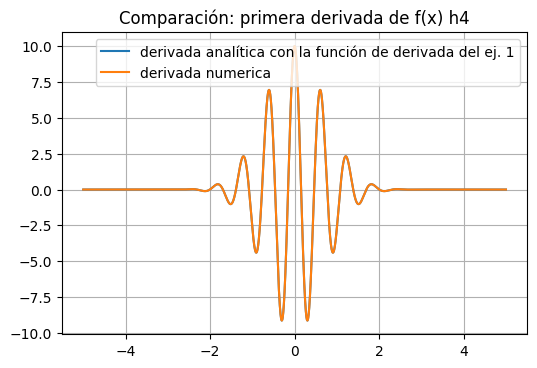

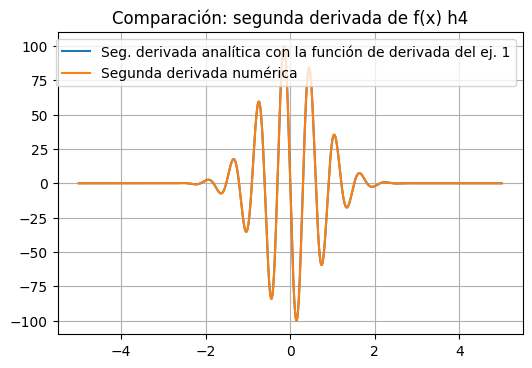

In [ ]:
# Comparación con la función de derivada del ejercicio 1
df2 = mi_derivada(x1,f)
d2f2 = mi_derivada(x1,df_analit)

figure(dpi=100)
plot(x1,df_analit, label = 'derivada analítica con la función de derivada del ej. 1')
plot(x1,df2,  label = 'derivada numerica')
plt.title('Comparación: primera derivada de f(x) h4')
legend()
grid()
show()

figure(dpi=100)
plot(x1,d2f_analit, label ='Seg. derivada analítica con la función de derivada del ej. 1')
plot(x1,d2f2, label = 'Segunda derivada numérica')
plt.title('Comparación: segunda derivada de f(x) h4')
legend()
grid()
show()
# Df analítica se encuentra debajo de Df numérica al igual que D2f

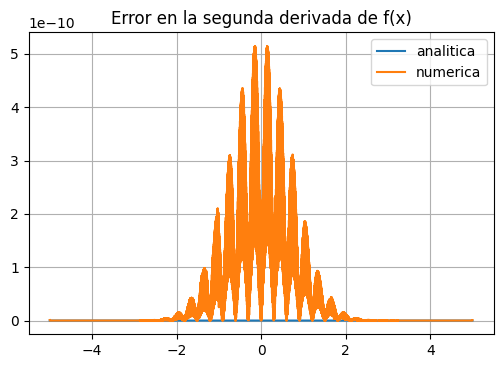

In [ ]:
# error de la segunda derivada
figure(dpi=100)
plot(x1,abs(d2f_analit-d2f_analit), label = 'analitica') 
plot(x1,abs(d2f_analit-d2f2), label = 'numerica')
plt.title('Error en la segunda derivada de f(x)')
legend()
grid()
show()


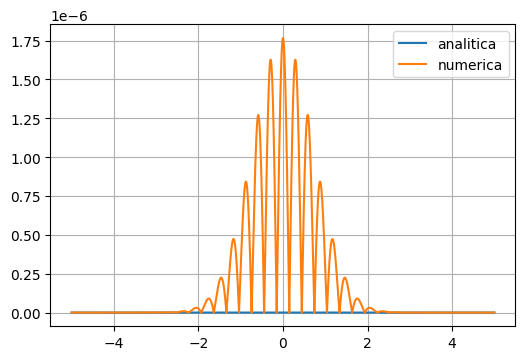

In [ ]:
# error de la primer derivada con la función del primer ejercicio
figure(dpi=100)
plot(x1,abs(df_analit-df_analit), label = 'analitica') 
plot(x1,abs(df_analit-df), label = 'numerica') # Se observa que tiene error en los extremos del orden de 1e-6 en el caso de la derivada
legend()
grid()
show()

###(b) Para g

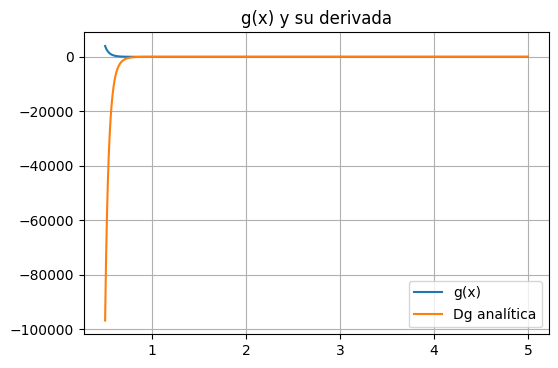

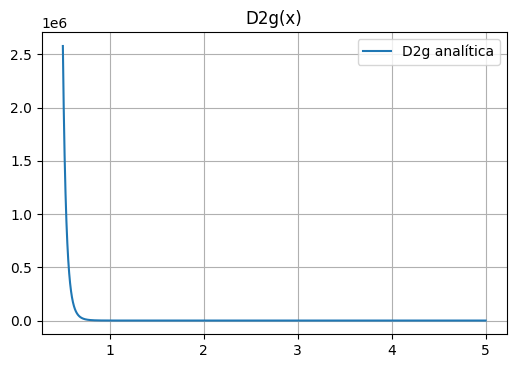

In [ ]:
# g(x) 
x2 = linspace(0.5,5,100000)
g = -2/(x2**6) + 1/(x2**12)
dg_analit = (12/(x2**7)) - (12/(x2**13))
# Segundas derivada de g con mi_derivada_h2
d2g_analit = (84/(x2**8)) + (156/(x2**14)) # Segunda derivada analítica de g
d2g = mi_derivada_h2(x2,dg)  # Segunda derivada analítica de g con la función creada
# Derivada de g con mi_derivada_h2
dg = mi_derivada(x2,g)

figure(dpi=100)
plot(x2,g, label = 'g(x)')
plot(x2, dg_analit, label= 'Dg analítica')
plt.title("g(x) y su derivada")
legend()
grid()
show()

figure(dpi=100)

plot(x2, d2g_analit, label = 'D2g analítica')
plt.title("D2g(x)")
legend()
grid()
show()

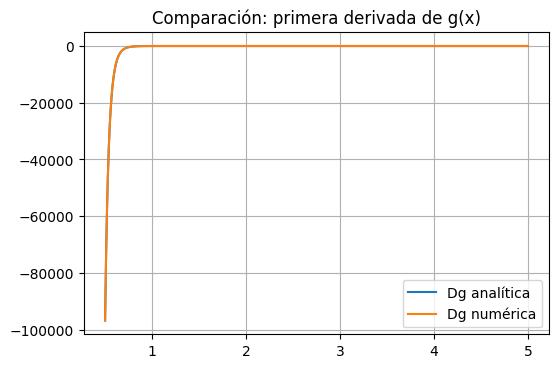

In [ ]:
# Gráfica comparación de las derivadas
figure(dpi=100) 
plot(x2, dg_analit, label = 'Dg analítica')
plot(x2, dg , label = 'Dg numérica')
plt.title('Comparación: primera derivada de g(x)')
legend()
grid()
show()

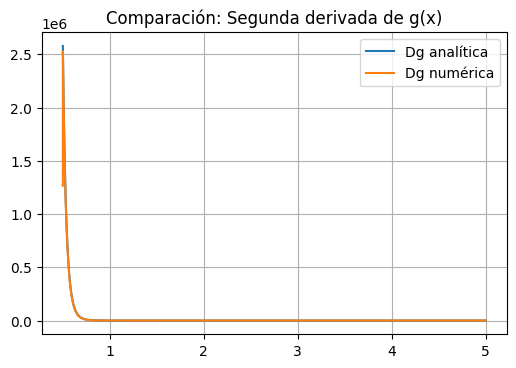

In [ ]:
# Grafica comparación de las segundas derivadas
figure(dpi=100) 
plot(x2, d2g_analit, label = 'Dg analítica')
plot(x2, d2g , label = 'Dg numérica')
plt.title('Comparación: Segunda derivada de g(x)')
legend()
grid()
show()

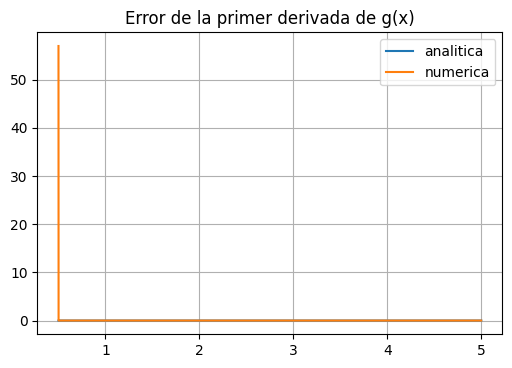

In [ ]:
# error de la primer derivada
figure(dpi=100)
plot(x2,abs(dg_analit-dg_analit), label = 'analitica') 
plot(x2,abs(dg_analit-dg), label = 'numerica') # Se observa que tiene error en los extremos del orden de 1e-6 en el caso de la derivada
plt.title('Error de la primer derivada de g(x)')
legend()
grid()
show()

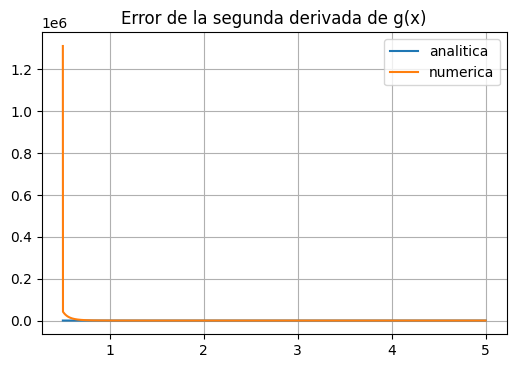

In [ ]:
# error de la primer derivada
figure(dpi=100)
plot(x2,abs(d2g_analit-d2g_analit), label = 'analitica') 
plot(x2,abs(d2g_analit-d2g), label = 'numerica') # Se observa que tiene error en los extremos del orden de 1e-6 en el caso de la derivada
plt.title('Error de la segunda derivada de g(x)')
legend()
grid()
show()

3. Utilizando las funciones en el primer problema, obtenga el valor de la integral de una función despreciando terminos mayores a $h4$ para una malla uniforme y calcule las siguientes integrales: donde $f(x)$ y $g(x)$ son las mismas que las del problema 2. Muestre que ha podido obtener la integral hasta una precisión de $10^{−5}$. Cada problema vale 10 puntos.

(a)$$
\int_{0} ^ {5} f(x) dx
$$
(b) 
$$
\int_{-5} ^ {5} f(x)^2 dx
$$
(c)
$$
\int_{0.5} ^ {5} f(x) dx
$$

In [ ]:
# Integrales 
#Los valores de las integrales son los siguientes de acuerdo a los valores calculados analíticamente (con calculadora)
# inciso (a)
A = 0.10213 #... las cifras continúan
# inciso (b) 
B = 0.62665 #...  las cifras continúan
# inciso (C) 
C = 173.38194 #...  las cifras continúan

# Recordemos
a = linspace(0,5,100000) #Límites a evaluar de la integral para el inciso (a)
b = linspace(-5,5,100000) #Límites a evaluar de la integral para el inciso (b)
# g ya tiene su dominio en la variable x2
fa = exp(-a**2)*sin(10*a)
f_cuadrada = (exp(-b**2)*sin(10*b))**2
g = -2/(x2**6) + 1/(x2**12)

In [ ]:
A1 = mi_integral(a,fa)
B1 = mi_integral(b,f_cuadrada)
C1 = mi_integral(x2,g)

Se observan que tienen la presición requerida:

In [ ]:
print('Resultado de la integral numérica del inciso (a)','-----', A1) 

Resultado de la integral numérica del inciso (a) ----- 0.10213407442379673


In [ ]:
print('Resultado de la integral numérica del inciso (b)','-----', B1) 

Resultado de la integral numérica del inciso (b) ----- 0.6266570686553574


In [ ]:
print('Resultado de la integral numérica del inciso (c)','-----', C1) 

Resultado de la integral numérica del inciso (c) ----- 173.38194618020543


Cada problema vale 10 puntos.